<a href="https://colab.research.google.com/github/Aksharaloya/CognoRise/blob/main/Customer_Personality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("/content/marketing_campaign.csv", sep=('\t'))

In [49]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [50]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [52]:
df.shape

(2240, 29)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [30]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [31]:
df['Education']=df['Education'].astype('category')
df['Marital_Status']=df['Marital_Status'].astype('category')
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['year'] = df['Dt_Customer'].dt.year
df['month'] = df['Dt_Customer'].dt.month
df['day'] = df['Dt_Customer'].dt.day
df['day_of_week'] = df['Dt_Customer'].dt.dayofweek

In [32]:
df.rename(columns={'Year_Birth': 'Age'},inplace=True)
df['Age'] = 2024 - df['Age']

In [33]:
df.describe()

,ID,Age,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year,month,day,day_of_week
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,55.194196,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,0.064286,0.013393,0.009375,3.0,11.0,0.149107,2013.028125,6.467411,15.638393,2.989732
min,0.000000,28.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,1.000000,1.000000,0.000000
25%,2828.250000,47.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,3.000000,8.000000,1.000000
50%,5458.500000,54.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,6.000000,16.000000,3.000000
75%,8427.750000,65.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,10.000000,23.000000,5.000000
max,11191.000000,131.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,12.000000,31.000000,6.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.684554,3.486695,8.790680,1.999192


In [34]:
df.drop(columns=['ID','Dt_Customer'],inplace=True)

<ipython-input-54-afb181a20ba7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_var, data=df, palette='Set2') # Added data=df


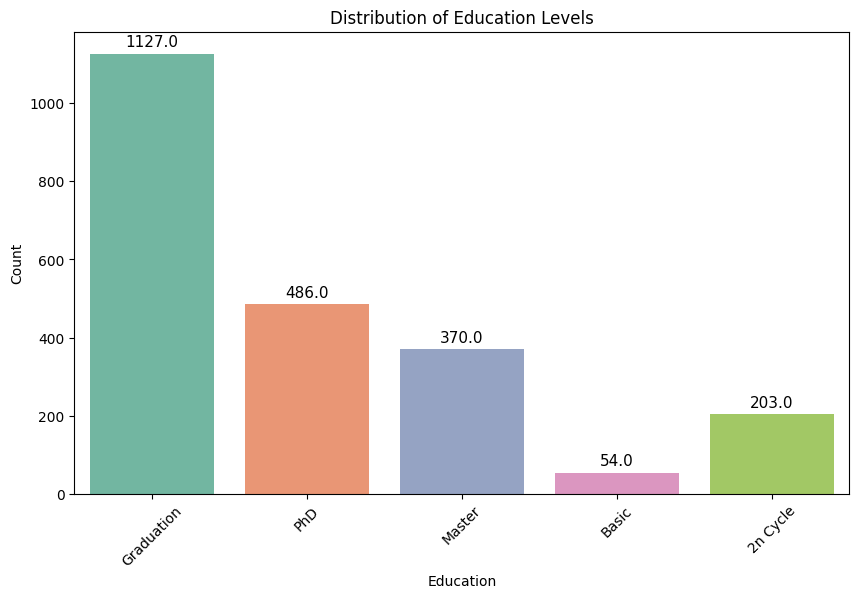

<ipython-input-54-afb181a20ba7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x_var, data=df, palette='Set2') # Added data=df


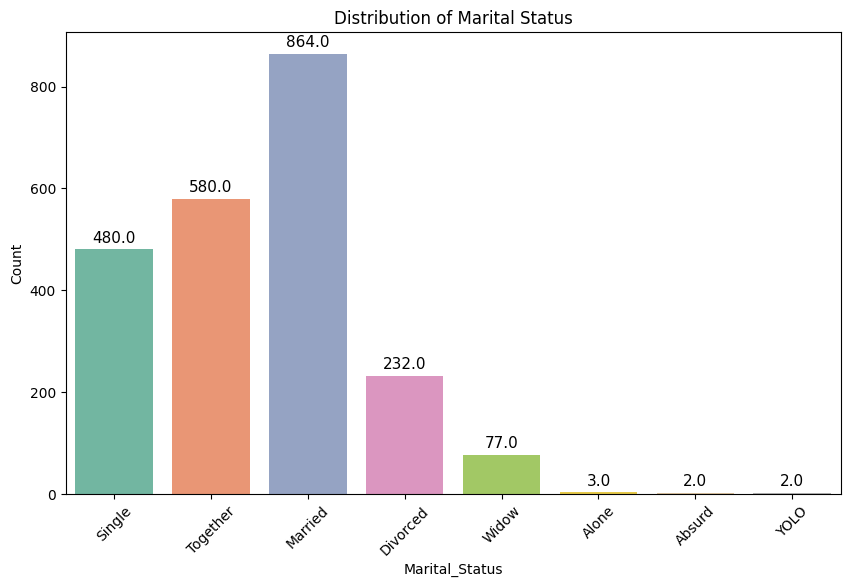

In [54]:
def plot_count_with_line(df, x_var, title):
    plt.figure(figsize=(10, 6))
    # Bar plot with numbers
    ax = sns.countplot(x=x_var, data=df, palette='Set2')
    # Add the numbers on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.title(title)
    plt.xlabel(x_var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()
# Plot for 'Education'
plot_count_with_line(df, 'Education', 'Distribution of Education Levels')
# Plot for 'Marital_Status'
plot_count_with_line(df, 'Marital_Status', 'Distribution of Marital Status')

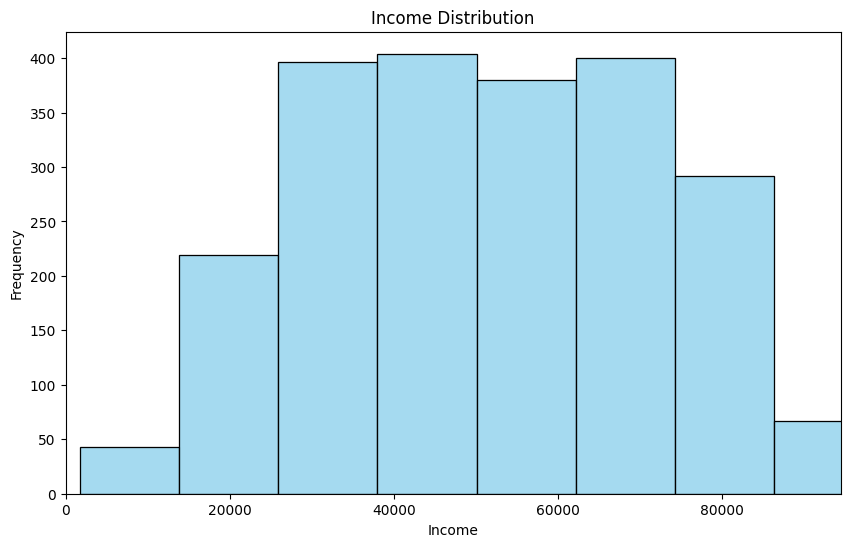

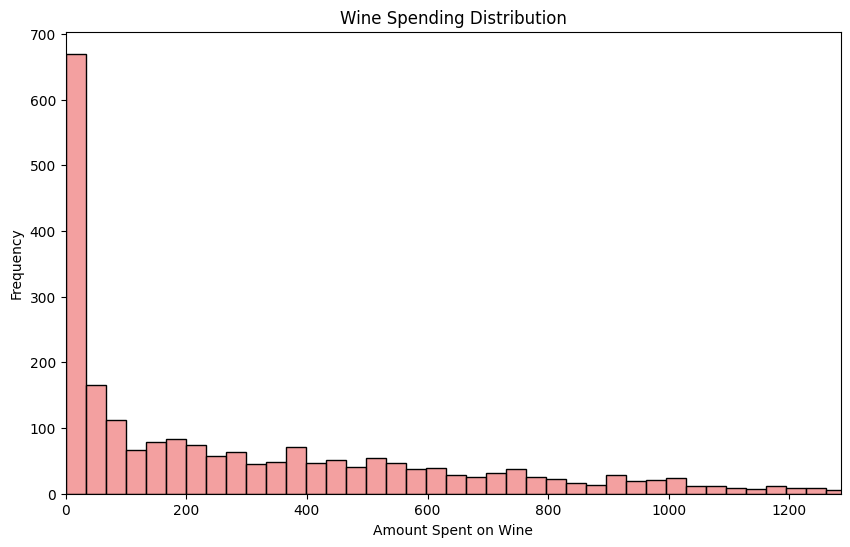

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=55, kde=False, color='skyblue', edgecolor='black')
plt.xlim(0, df['Income'].quantile(0.99))  # Focus on the first 99% of the data to avoid extreme outliers
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()
# Histogram of 'MntWines' with transformations and improvements
plt.figure(figsize=(10, 6))
sns.histplot(df['MntWines'], bins=45, kde=False, color='lightcoral', edgecolor='black')
plt.xlim(0, df['MntWines'].quantile(0.99))  # Focus on the first 99% of the data to avoid extreme outliers
plt.title('Wine Spending Distribution')
plt.xlabel('Amount Spent on Wine')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

<ipython-input-56-07e2afe867e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marital_Status', y='MntWines', data=df, palette='Set2', showfliers=False)


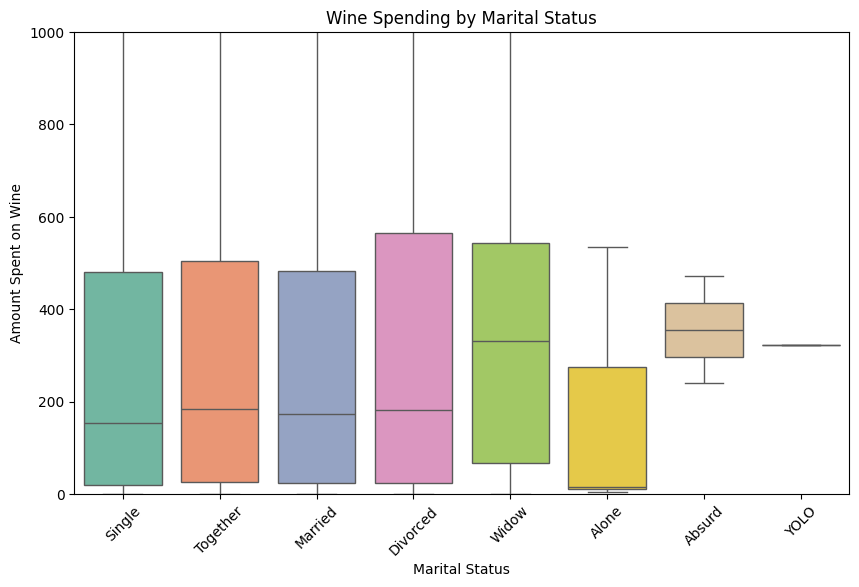

<ipython-input-56-07e2afe867e1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='MntMeatProducts', data=df, palette='Set2', showfliers=False)


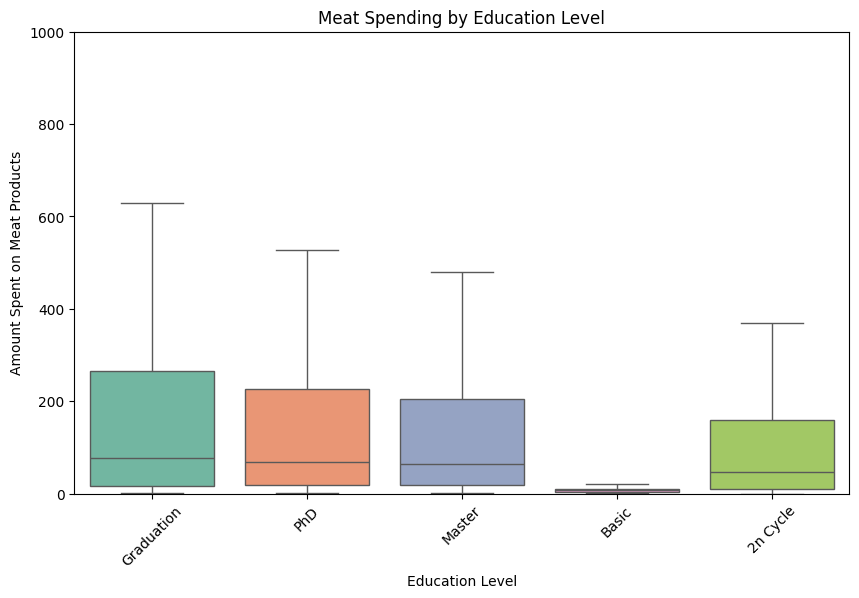

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='MntWines', data=df, palette='Set2', showfliers=False)
plt.title('Wine Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Amount Spent on Wine')
plt.xticks(rotation=45)
plt.ylim(0, 1000)  # Adjust the Y-axis limit as needed
plt.grid(False)
plt.show()

# Boxplot for 'MntMeatProducts' with improvements
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='MntMeatProducts', data=df, palette='Set2', showfliers=False)
plt.title('Meat Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Amount Spent on Meat Products')
plt.xticks(rotation=45)
plt.ylim(0, 1000)  # Adjust the Y-axis limit as needed
plt.grid(False)
plt.show()

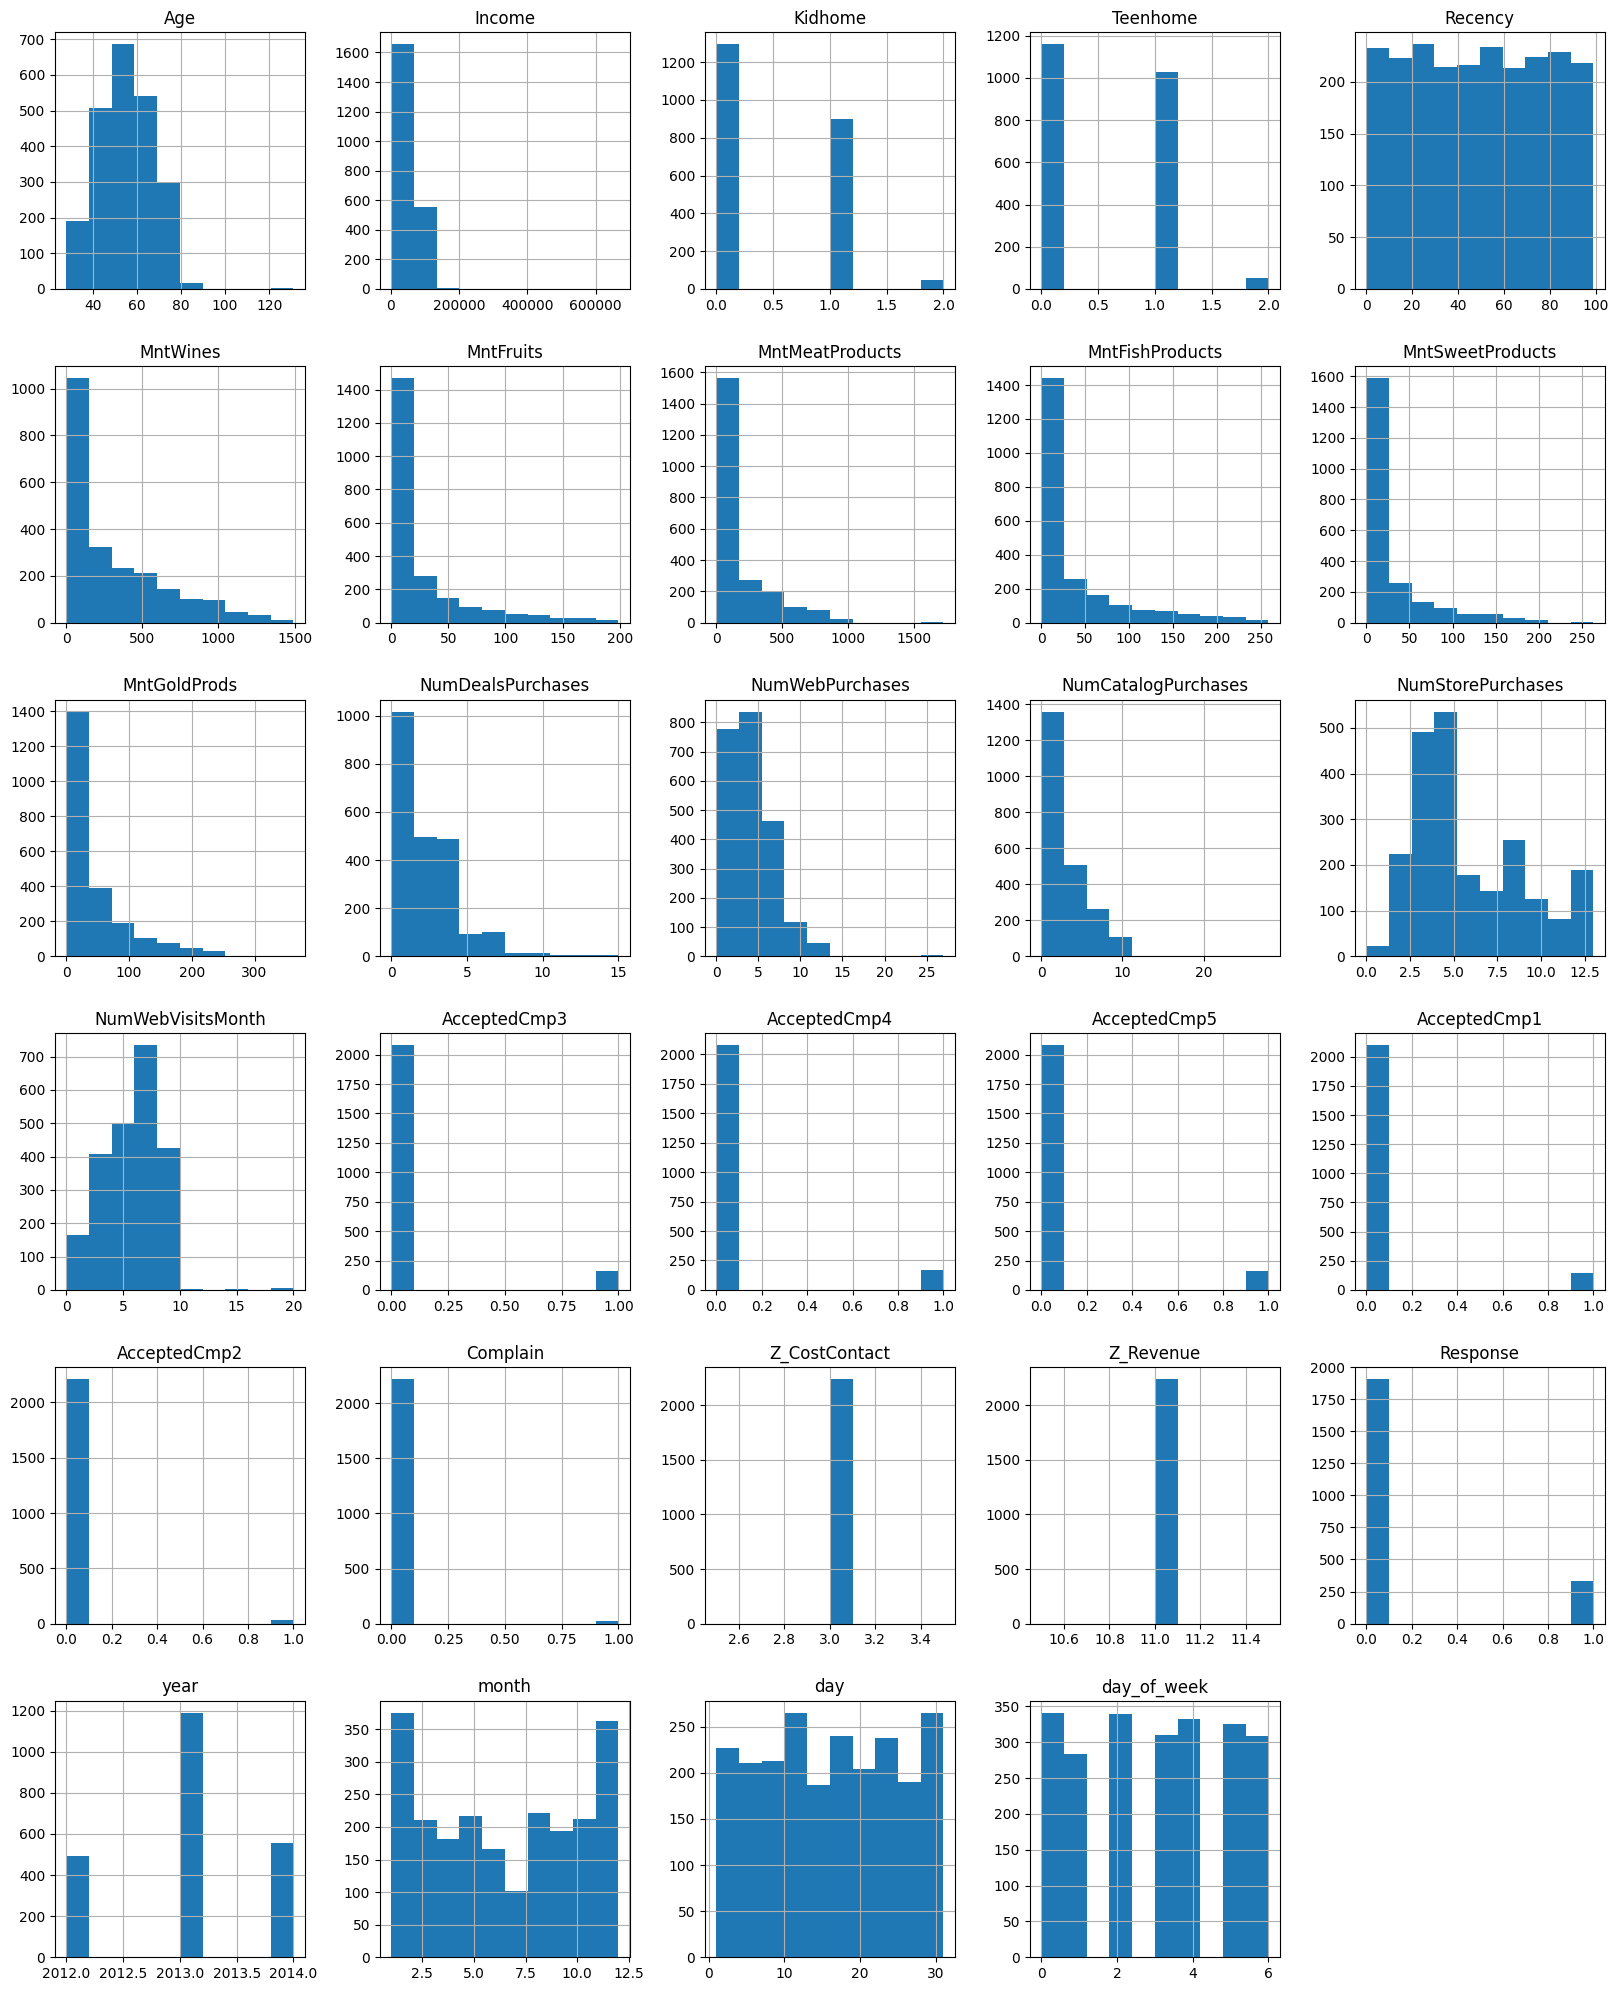

In [35]:
df.hist(figsize=(20,25))
plt.show()

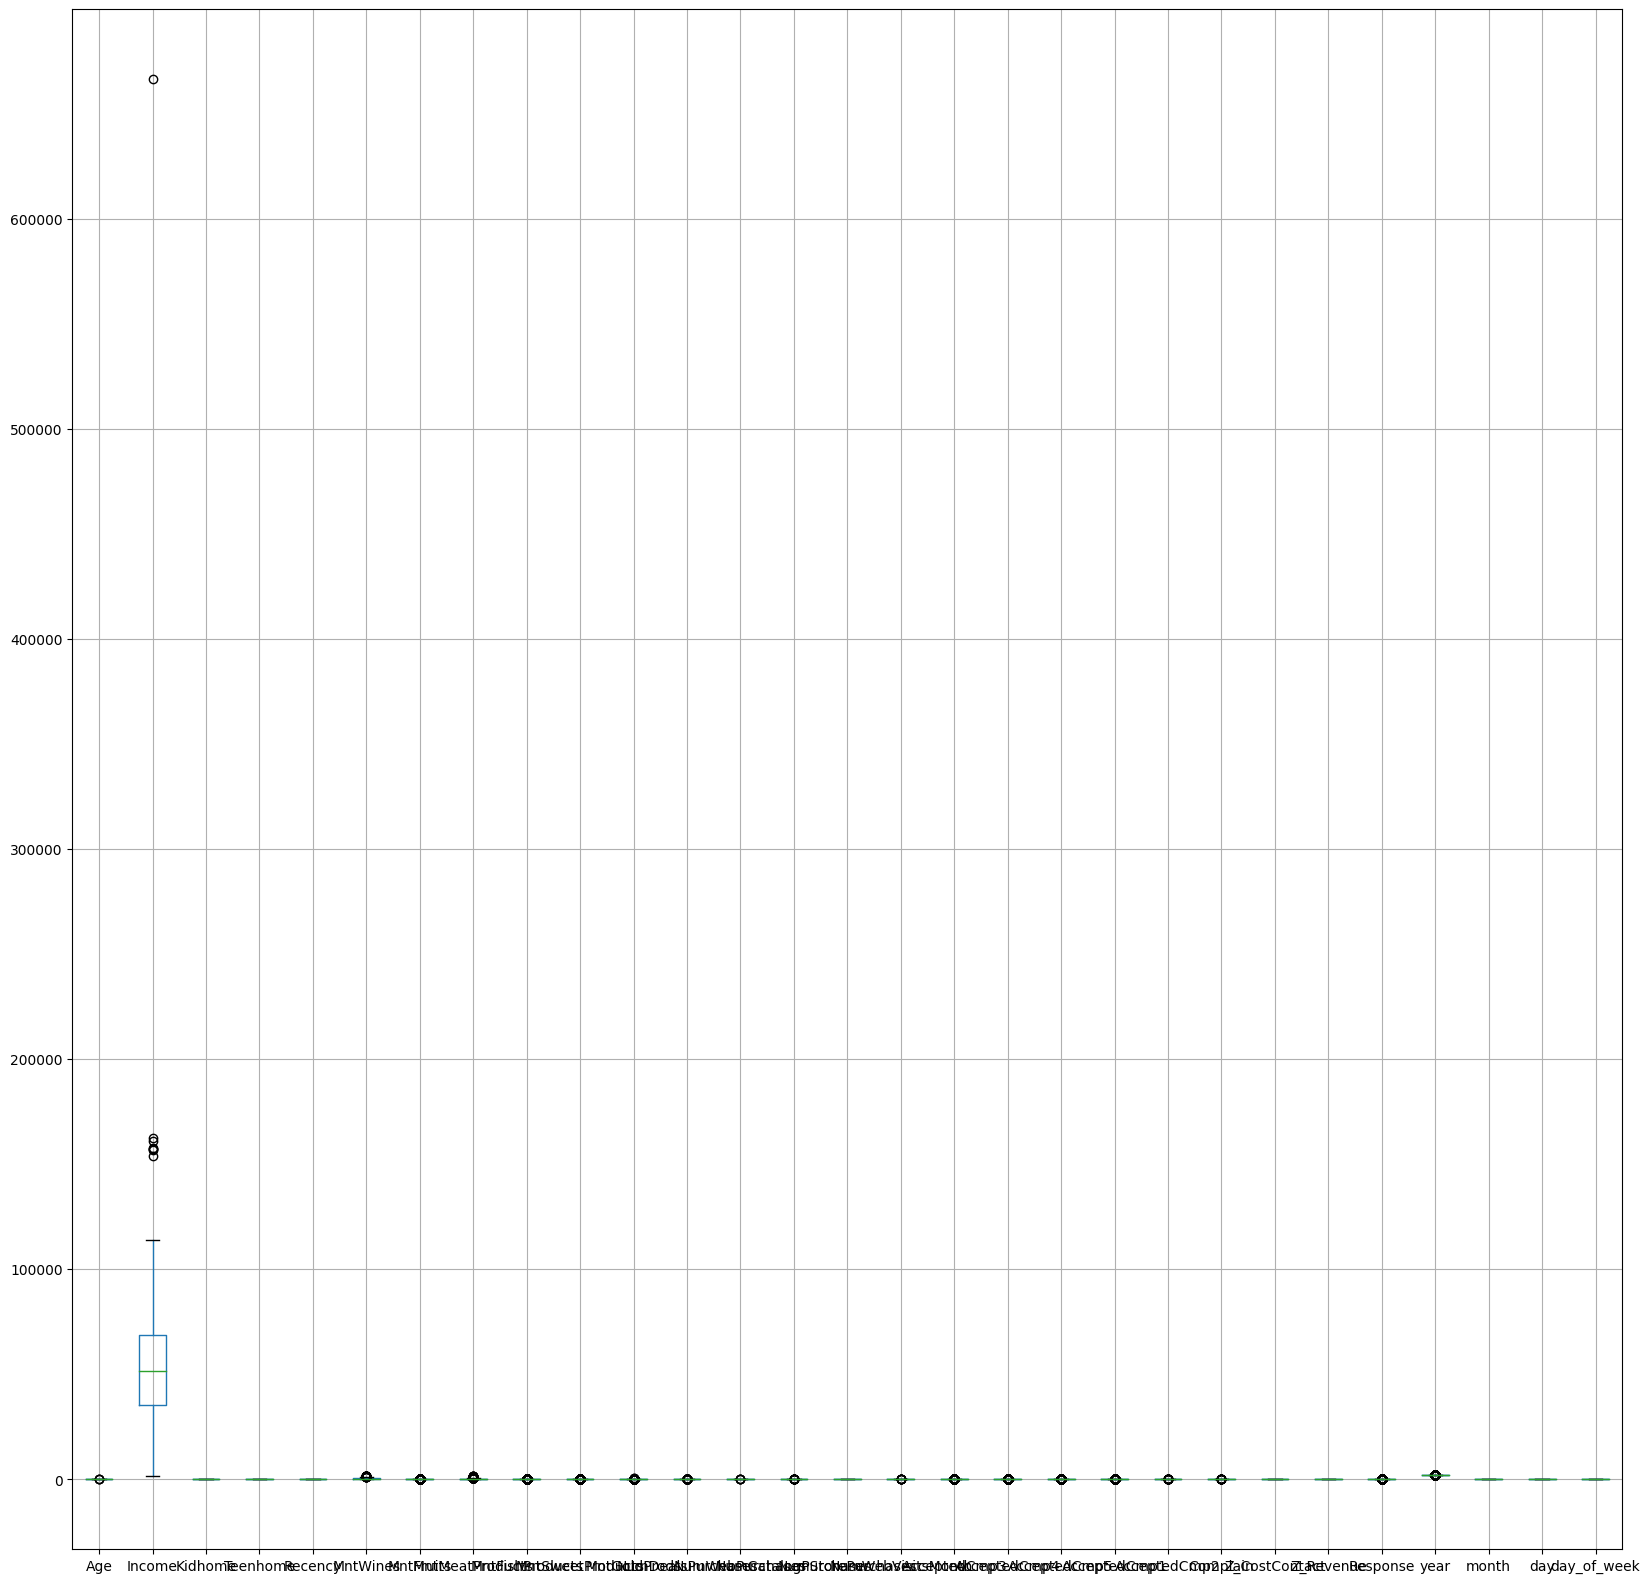

In [36]:
df.boxplot(figsize=(20,20))
plt.show()

In [37]:
corr = df.corr(numeric_only=True)

<Axes: >

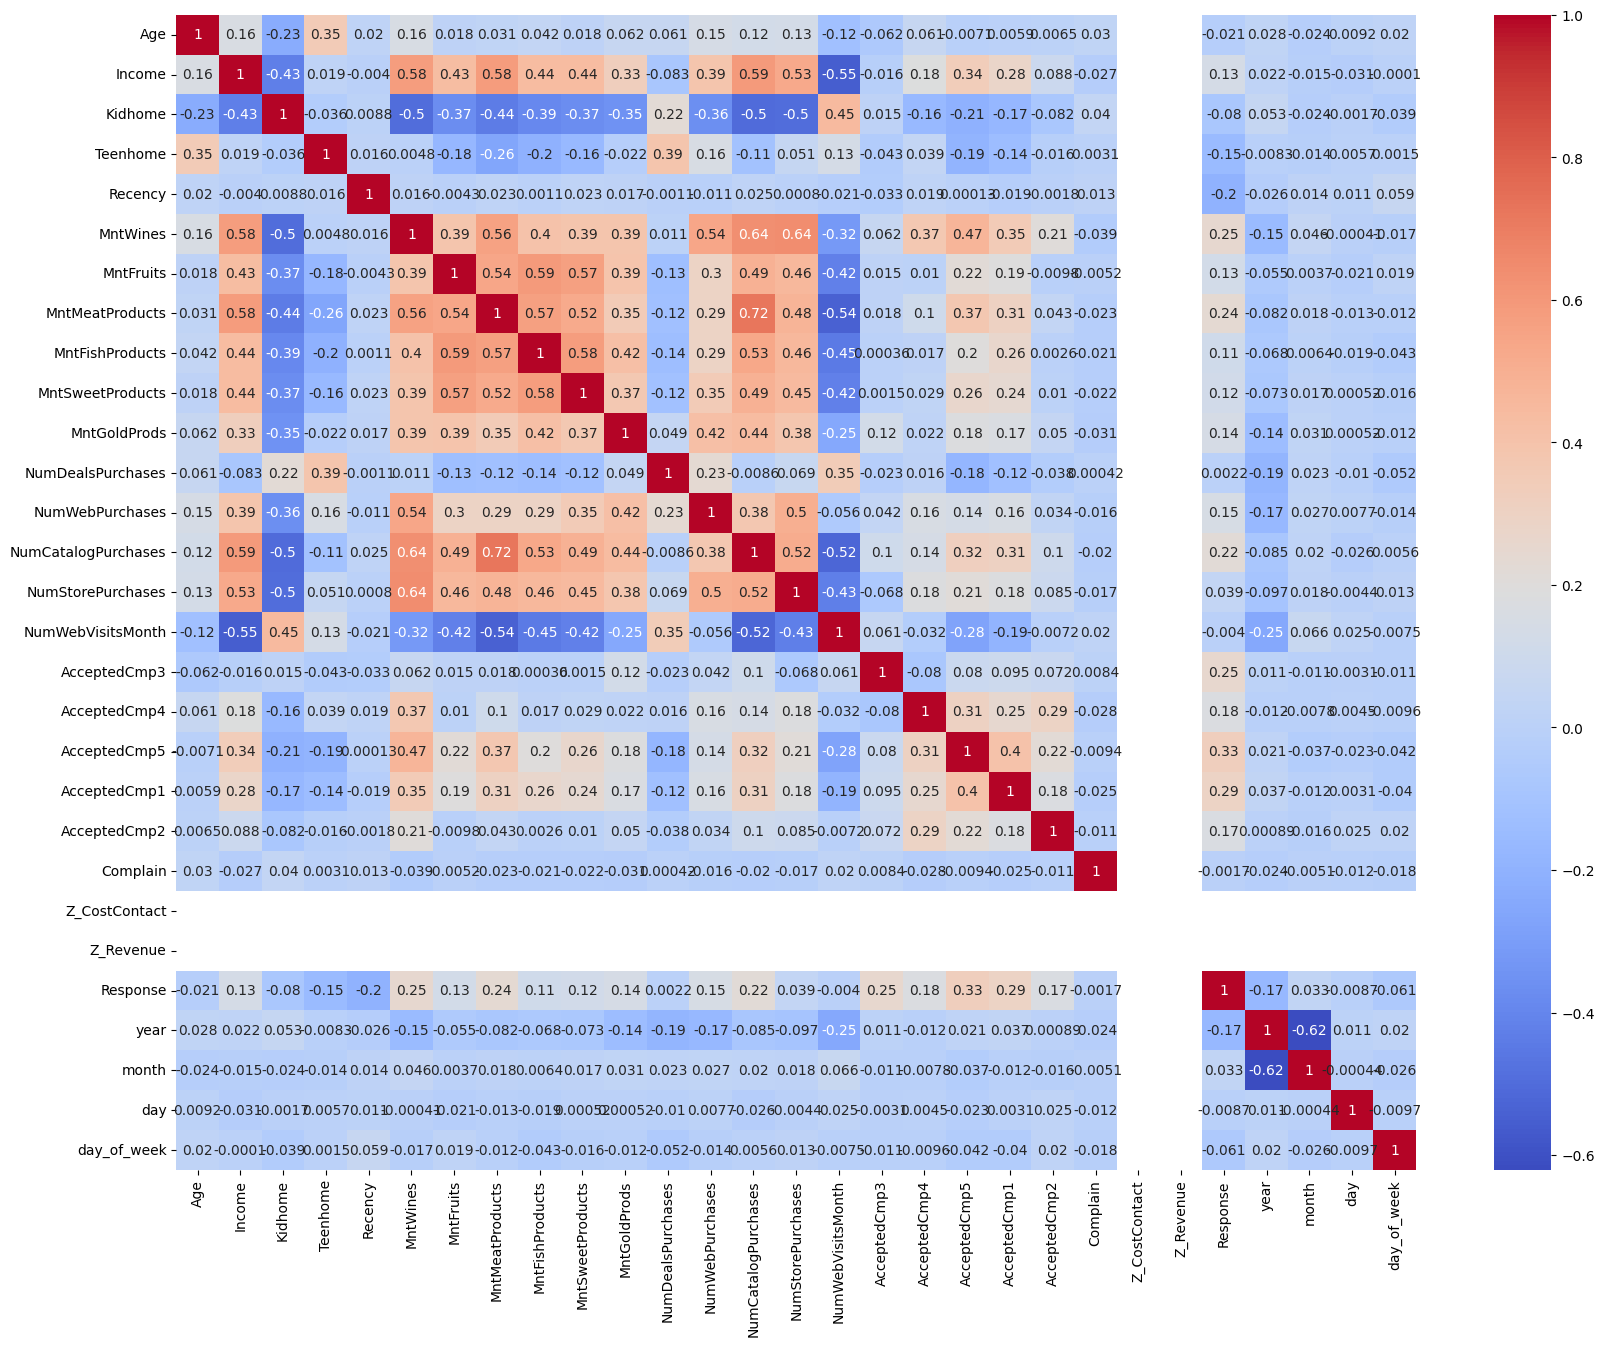

In [38]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [40]:
Q1 = df.select_dtypes(include=np.number).quantile(0.25)
Q3 = df.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df.select_dtypes(include=np.number) < lower_bound) | (df.select_dtypes(include=np.number) > upper_bound)).any(axis=1)
df = df[~outliers]

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ('num_attribs', num_pipeline, ['Age','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response','year','month','day','day_of_week']),
    ('cat', cat_pipeline, ['Education', 'Marital_Status'])
])
df = full_pipeline.fit_transform(df)

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10)  # Or choose a different value

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10)  # Or choose a different value
kmeans.fit(df) # Fit the model to the data

KMeans(n_clusters=5, n_init=10)

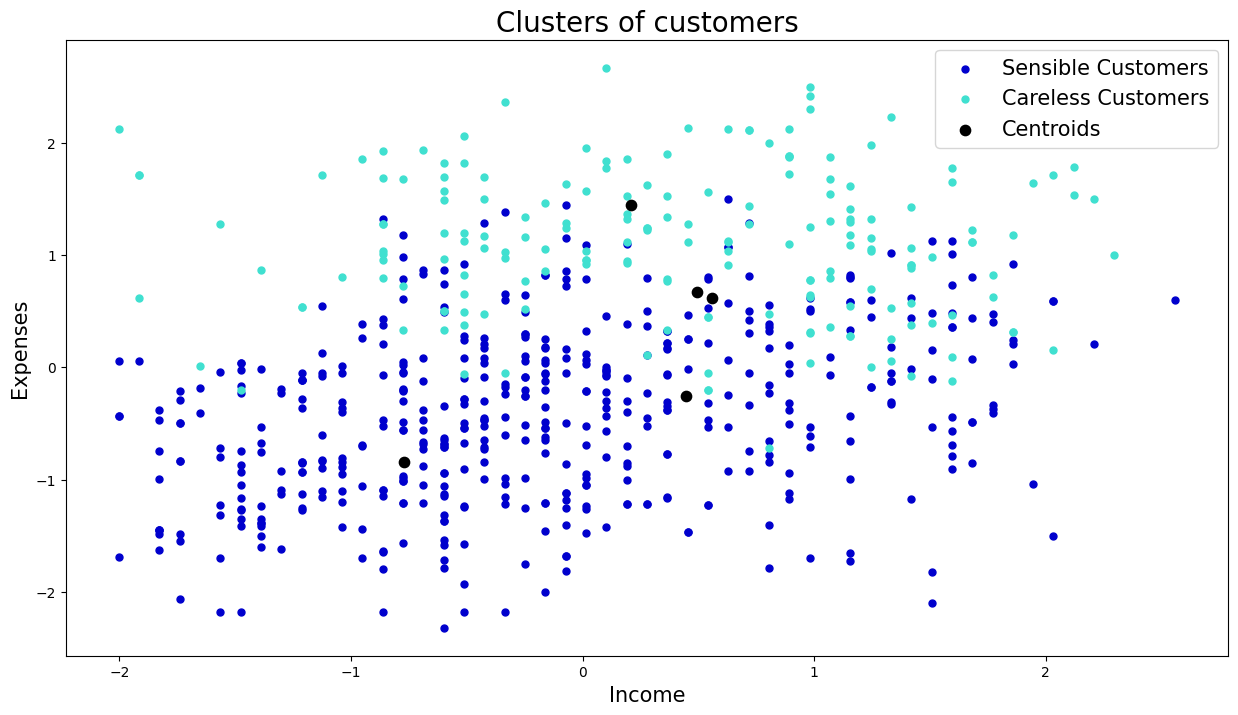

In [47]:
plt.figure(figsize= (15,8))
plt.scatter(df[Y == 0, 0], df[Y == 0, 1], s = 25, c = 'mediumblue', label = 'Sensible Customers')
plt.scatter(df[Y == 1, 0], df[Y == 1, 1], s = 25, c = 'turquoise', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()